In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from IPython.display import Image

In [2]:
tr=pd.read_csv('train.csv', index_col=0)
ts=pd.read_csv('test_x.csv', index_col=0)
submission=pd.read_csv('sample_submission.csv', index_col=0)  

In [3]:
Answers = ['QaA', 'QbA', 'QcA', 'QdA', 'QeA',
             'QfA', 'QgA', 'QhA', 'QiA', 'QjA', 
             'QkA', 'QlA', 'QmA', 'QnA', 'QoA', 
             'QpA', 'QqA', 'QrA', 'QsA', 'QtA']

<AxesSubplot:>

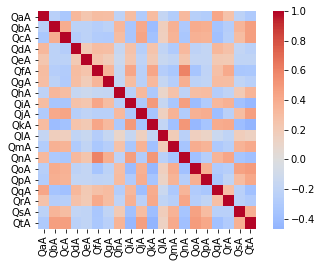

In [4]:
correlations = tr[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [5]:
for col in tr[Answers]:
    print(sorted(tr[col].unique()))

[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]
[1.0, 2.0, 3.0, 4.0, 5.0]


In [6]:
flipping_columns = ["QeA", "QfA", "QkA", "QqA", "QrA"]
for flip in flipping_columns: 
    tr[flip] = 6 - tr[flip]

<AxesSubplot:>

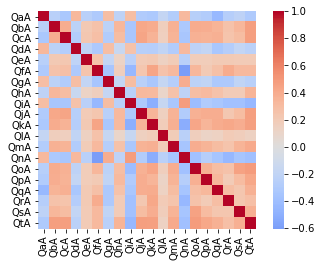

In [7]:
correlations = tr[Answers].corr(method = 'spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [8]:
flipping_secret_columns = ["QaA", "QdA", "QgA", "QiA", "QnA"]
for flip in flipping_secret_columns: 
    tr[flip] = 6 - tr[flip]

<AxesSubplot:>

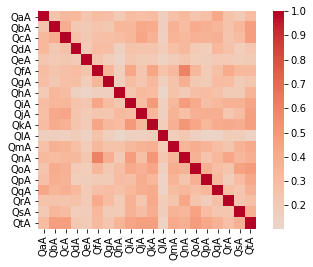

In [9]:
correlations = tr[Answers].corr(method='spearman')
sns.heatmap(correlations, cmap="coolwarm", square=True, center=0)

In [10]:
tr['Mach_score'] = tr[Answers].mean(axis = 1)
tr.head()

,QaA,QaE,QbA,QbE,QcA,QcE,QdA,QdE,QeA,QeE,...,wr_05,wr_06,wr_07,wr_08,wr_09,wr_10,wr_11,wr_12,wr_13,Mach_score
index,,,,,,,,,,,,,,,,,,,,,
0,3.0,363,4.0,1370,5.0,997,5.0,1024,4.0,1577,...,1,0,1,1,0,1,0,1,1,2.95
1,1.0,647,5.0,1313,3.0,3387,1.0,2969,5.0,4320,...,1,0,1,1,0,1,0,1,1,2.60
2,2.0,1623,1.0,1480,1.0,1021,2.0,3374,1.0,1333,...,1,0,1,1,1,1,0,1,1,1.90
3,3.0,504,3.0,2311,4.0,992,3.0,3245,5.0,357,...,0,0,0,1,0,1,0,1,1,3.35
4,5.0,927,1.0,707,5.0,556,4.0,1062,5.0,1014,...,1,1,1,1,0,1,1,1,1,3.00


In [11]:
tr[['Mach_score']].describe()

,Mach_score
count,45532.000000
mean,3.352474
std,0.794661
min,1.000000
25%,2.750000
50%,3.350000
75%,3.950000
max,5.000000


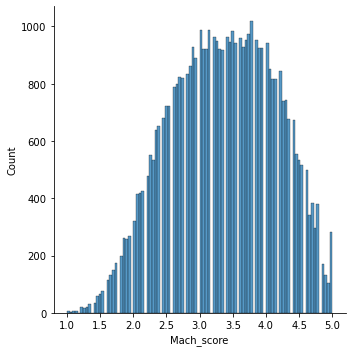

In [12]:
sns.displot(tr, x="Mach_score", bins=100)

In [13]:
t_plus = tr[['tp01', 'tp03', 'tp05', 'tp07', 'tp09']]
t_plus_ts = ts[['tp01', 'tp03', 'tp05', 'tp07', 'tp09']]
t_minus = tr[['tp02', 'tp04', 'tp06', 'tp08', 'tp10']]
t_minus_ts = ts[['tp02', 'tp04', 'tp06', 'tp08', 'tp10']]

tr['t_plus_total'] = t_plus.sum(axis=1)
tr['t_plus_mean'] = t_plus.mean(axis=1)
tr['t_plus_max'] = t_plus.max(axis=1)
tr['t_plus_min'] = t_plus.min(axis=1)

ts['t_plus_total'] = t_plus_ts.sum(axis=1)
ts['t_plus_mean'] = t_plus_ts.mean(axis=1)
ts['t_plus_max'] = t_plus_ts.max(axis=1)
ts['t_plus_min'] = t_plus_ts.min(axis=1)

tr['t_minus_total'] = t_minus.sum(axis=1)
tr['t_minus_mean'] = t_minus.mean(axis=1)
tr['t_minus_max'] = t_minus.max(axis=1)
tr['t_minus_min'] = t_minus.min(axis=1)

ts['t_minus_total'] = t_minus_ts.sum(axis=1)
ts['t_minus_mean'] = t_minus_ts.mean(axis=1)
ts['t_minus_max'] = t_minus_ts.max(axis=1)
ts['t_minus_min'] = t_minus_ts.min(axis=1)

Q_E = tr[['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 
          'QpE', 'QqE', 'QrE', 'QsE', 'QtE']]
Q_E_ts = ts[['QaE', 'QbE', 'QcE', 'QdE', 'QeE', 'QfE', 'QgE', 'QhE', 'QiE', 'QjE', 'QkE', 'QlE', 'QmE', 'QnE', 'QoE', 
          'QpE', 'QqE', 'QrE', 'QsE', 'QtE']]

time_4q = Q_E.mean(axis=1).quantile([.25,.5,.75])
tr['Q_E_4q'] = Q_E.mean(axis=1).apply(lambda x : 1 if x<time_4q.iloc[0]
                                     else (2 if x<time_4q.iloc[1] else (3 if x<time_4q.iloc[2] else 4)))

time_4q_ts = Q_E_ts.mean(axis=1).quantile([.25,.5,.75])
ts['Q_E_4q'] = Q_E_ts.mean(axis=1).apply(lambda x : 1 if x<time_4q_ts.iloc[0]
                                     else (2 if x<time_4q_ts.iloc[1] else (3 if x<time_4q_ts.iloc[2] else 4)))

In [14]:
y = tr.voted
X = tr.drop('voted', axis = 1)
df = pd.concat([tr, ts], ignore_index = True)

In [18]:
f1 = df.loc[:, 'QaA':'QtE']
f2 = pd.get_dummies(df.age_group)
f3 = pd.get_dummies(df.education)
f3.columns = ['edu_'+str(i) for i in f3.columns]
f4 = (df.engnat - 1).apply(lambda x : np.nan if x == -1 else x)
f4.fillna(f4.mean(), inplace = True)
f5 = df.familysize
f6 = df.gender.apply(lambda x : 0 if x == 'Male' else 1)
f7 = pd.get_dummies(df.hand)
f7.columns =['hand_'+str(i) for i in f7.columns]
f8 = pd.get_dummies(df.married)
f8.columns = ['married_'+str(i) for i in f8.columns]
f9 = pd.get_dummies(df.race)
f10 = pd.get_dummies(df.religion)
f11 = df.loc[:, "tp01" : 'tp10']
f12 = pd.get_dummies(df.urban) ; f12
f12.columns = ['urban_'+str(i) for i in f12.columns]
f13 = df.loc[:, 'wf_01' : 'wr_13']
f14 = df.loc[:, 'Mach_score':'Q_E_4q']

In [27]:
from sklearn.decomposition import PCA

def pca_df(df):
    max_col = df.shape[1] # 차원축소하려는 데이터의 column의 개수
    pca = PCA(n_components=max_col, random_state=0).fit(df)

    cumsum = np.cumsum(pca.explained_variance_ratio_) # 분산의 설명량을 누적합
    num_col = np.argmax(cumsum >= 0.99) + 1 # 분산의 설명량이 99%이상 되는 차원의 수

    # 차원축소
    pca = PCA(n_components = num_col, random_state=0).fit_transform(df)
    pca_f = pd.DataFrame(pca)
    return pca_f

In [31]:
df.Mach_score.isnull().sum()

11383

In [32]:
f2 = pca_df(f2) # age_group
f3 = pca_df(f3) # education
f7 = pca_df(f7) # hand
f8 = pca_df(f8) # married
f9 = pca_df(f9) # race
f10 = pca_df(f10) # religion
f12 = pca_df(f12) # urban
f13 = pca_df(f13) # wf, wr

In [33]:
foo = pd.concat([f1, f2, f3, f4, f5, f6, f7, f8, f9, f10, f11, f12, f13, f14], axis = 1)

In [34]:
X = foo[:45532]
test = foo[45532:]

In [35]:
# nan 값 메꾸기
X = X.fillna(X.mean())
# 중복 값 제거
X.drop_duplicates(keep='first', inplace = True)
# 비교 -> nan 없음
X.shape

D:\Anaconda\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
D:\Anaconda\lib\site-packages\pandas\core\frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


(45532, 110)

In [36]:
from sklearn.preprocessing import MinMaxScaler
# 데이터 스케일링 -> 민맥스/스텐다드 모두 성능 비슷함
scaler=MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
# 테스트 데이터도 동일 스케일러로
test=scaler.transform(test) 

In [37]:
import lightgbm as lgbm
from bayes_opt import BayesianOptimization
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import cross_validate

In [38]:
#목적함수 생성
def lgbm_cv(learning_rate, num_leaves, max_depth, min_child_weight, colsample_bytree, feature_fraction, bagging_fraction, lambda_l1, lambda_l2):
    model = lgbm.LGBMClassifier(learning_rate=learning_rate,
                                n_estimators = 300,
                                #boosting = 'dart',
                                num_leaves = int(round(num_leaves)),
                                max_depth = int(round(max_depth)),
                                min_child_weight = int(round(min_child_weight)),
                                colsample_bytree = colsample_bytree,
                                feature_fraction = max(min(feature_fraction, 1), 0),
                                bagging_fraction = max(min(bagging_fraction, 1), 0),
                                lambda_l1 = max(lambda_l1, 0),
                                lambda_l2 = max(lambda_l2, 0)
                               )
    scoring = {'roc_auc_score': make_scorer(roc_auc_score)}
    result = cross_validate(model, X, y, cv=5, scoring=scoring)
    auc_score = result["test_roc_auc_score"].mean()
    return auc_score

In [39]:
# 입력값의 탐색 대상 구간
pbounds = {'learning_rate' : (0.0001, 0.05),
           'num_leaves': (300, 600),
           'max_depth': (2, 25),
           'min_child_weight': (30, 100),
           'colsample_bytree': (0, 0.99),
           'feature_fraction': (0.0001, 0.99),
           'bagging_fraction': (0.0001, 0.99),
           'lambda_l1' : (0, 0.99),
           'lambda_l2' : (0, 0.99),
          }

In [40]:
#객체 생성
lgbmBO = BayesianOptimization(f = lgbm_cv, pbounds = pbounds, verbose = 2, random_state = 0 )

In [41]:
# 반복적으로 베이지안 최적화 수행
# acq='ei'사용
# xi=0.01 로 exploration의 강도를 조금 높임
lgbmBO.maximize(init_points=5, n_iter = 20, acq='ei', xi=0.01)

|   iter    |  target   | baggin... | colsam... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------------------------------
[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fraction=0.5967754659733202
[LightGBM] [Warning] lambda_l1 is set=0.5394343511669278, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5394343511669278
[LightGBM] [Warning] bagging_fraction is set=0.5433704875376587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5433704875376587
[LightGBM] [Warning] lambda_l2 is set=0.41941825134551564, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.41941825134551564
[LightGBM] [Warning] feature_fraction is set=0.5967754659733202, colsample_bytree=0.7080374727086953 will be ignored. Current value: feature_fracti

[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_fraction=0.770397367765257
[LightGBM] [Warning] lambda_l2 is set=0.45686456863040253, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.45686456863040253
[LightGBM] [Warning] feature_fraction is set=0.968834296976213, colsample_bytree=0.8613120267643509 will be ignored. Current value: feature_fraction=0.968834296976213
[LightGBM] [Warning] lambda_l1 is set=0.7911669785745563, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7911669785745563
[LightGBM] [Warning] bagging_fraction is set=0.770397367765257, subsample=1.0 will be ignored. Current value: bagging_f

[LightGBM] [Warning] feature_fraction is set=0.03487529141029955, colsample_bytree=0.48749712506201703 will be ignored. Current value: feature_fraction=0.03487529141029955
[LightGBM] [Warning] lambda_l1 is set=0.31402894516717356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31402894516717356
[LightGBM] [Warning] bagging_fraction is set=0.0841470837165561, subsample=1.0 will be ignored. Current value: bagging_fraction=0.0841470837165561
[LightGBM] [Warning] lambda_l2 is set=0.8856542544123545, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8856542544123545
[LightGBM] [Warning] feature_fraction is set=0.03487529141029955, colsample_bytree=0.48749712506201703 will be ignored. Current value: feature_fraction=0.03487529141029955
[LightGBM] [Warning] lambda_l1 is set=0.31402894516717356, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.31402894516717356
[LightGBM] [Warning] bagging_fraction is set=0.0841470837165561, subsample=1.0 will be ignored. Current v

|  8        |  0.6927   |  0.4627   |  0.8973   |  0.1934   |  0.2185   |  0.6873   |  0.02114  |  2.209    |  51.38    |  330.6    |
[LightGBM] [Warning] feature_fraction is set=0.971697165631358, colsample_bytree=0.7472498015212533 will be ignored. Current value: feature_fraction=0.971697165631358
[LightGBM] [Warning] lambda_l1 is set=0.7137517527808852, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7137517527808852
[LightGBM] [Warning] bagging_fraction is set=0.0022403529967014854, subsample=1.0 will be ignored. Current value: bagging_fraction=0.0022403529967014854
[LightGBM] [Warning] lambda_l2 is set=0.20067901084790024, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.20067901084790024
[LightGBM] [Warning] feature_fraction is set=0.971697165631358, colsample_bytree=0.7472498015212533 will be ignored. Current value: feature_fraction=0.971697165631358
[LightGBM] [Warning] lambda_l1 is set=0.7137517527808852, reg_alpha=0.0 will be ignored. Current value: lambda

[LightGBM] [Warning] feature_fraction is set=0.99, colsample_bytree=0.9342470842415005 will be ignored. Current value: feature_fraction=0.99
[LightGBM] [Warning] lambda_l1 is set=0.81804351744773, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.81804351744773
[LightGBM] [Warning] bagging_fraction is set=0.99, subsample=1.0 will be ignored. Current value: bagging_fraction=0.99
[LightGBM] [Warning] lambda_l2 is set=0.5322013190222749, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.5322013190222749
|  11       |  0.7008   |  0.99     |  0.9342   |  0.99     |  0.818    |  0.5322   |  0.04276  |  5.434    |  66.96    |  336.0    |
[LightGBM] [Warning] feature_fraction is set=0.604923866439545, colsample_bytree=0.7938488233485312 will be ignored. Current value: feature_fraction=0.604923866439545
[LightGBM] [Warning] lambda_l1 is set=0.5888910546930741, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.5888910546930741
[LightGBM] [Warning] bagging_fraction is se

[LightGBM] [Warning] feature_fraction is set=0.5540125499879793, colsample_bytree=0.4306852997386442 will be ignored. Current value: feature_fraction=0.5540125499879793
[LightGBM] [Warning] lambda_l1 is set=0.15836918703176683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15836918703176683
[LightGBM] [Warning] bagging_fraction is set=0.19086450966225657, subsample=1.0 will be ignored. Current value: bagging_fraction=0.19086450966225657
[LightGBM] [Warning] lambda_l2 is set=0.02874733670894881, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.02874733670894881
[LightGBM] [Warning] feature_fraction is set=0.5540125499879793, colsample_bytree=0.4306852997386442 will be ignored. Current value: feature_fraction=0.5540125499879793
[LightGBM] [Warning] lambda_l1 is set=0.15836918703176683, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.15836918703176683
[LightGBM] [Warning] bagging_fraction is set=0.19086450966225657, subsample=1.0 will be ignored. Current va

[LightGBM] [Warning] feature_fraction is set=0.6418478185252069, colsample_bytree=0.5053377335281305 will be ignored. Current value: feature_fraction=0.6418478185252069
[LightGBM] [Warning] lambda_l1 is set=0.34126950072070067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.34126950072070067
[LightGBM] [Warning] bagging_fraction is set=0.8479488443185658, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8479488443185658
[LightGBM] [Warning] lambda_l2 is set=0.11148680882293621, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.11148680882293621
[LightGBM] [Warning] feature_fraction is set=0.6418478185252069, colsample_bytree=0.5053377335281305 will be ignored. Current value: feature_fraction=0.6418478185252069
[LightGBM] [Warning] lambda_l1 is set=0.34126950072070067, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.34126950072070067
[LightGBM] [Warning] bagging_fraction is set=0.8479488443185658, subsample=1.0 will be ignored. Current value

|  19       |  0.6969   |  0.8924   |  0.3743   |  0.6741   |  0.3188   |  0.8869   |  0.04706  |  11.93    |  86.1     |  567.9    |
[LightGBM] [Warning] feature_fraction is set=0.03103013037445152, colsample_bytree=0.03784665116935935 will be ignored. Current value: feature_fraction=0.03103013037445152
[LightGBM] [Warning] lambda_l1 is set=0.7626044538571031, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7626044538571031
[LightGBM] [Warning] bagging_fraction is set=0.9694965913149077, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9694965913149077
[LightGBM] [Warning] lambda_l2 is set=0.010157607058898455, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.010157607058898455
[LightGBM] [Warning] feature_fraction is set=0.03103013037445152, colsample_bytree=0.03784665116935935 will be ignored. Current value: feature_fraction=0.03103013037445152
[LightGBM] [Warning] lambda_l1 is set=0.7626044538571031, reg_alpha=0.0 will be ignored. Current value: 

[LightGBM] [Warning] feature_fraction is set=0.6400026711790456, colsample_bytree=0.485115593268771 will be ignored. Current value: feature_fraction=0.6400026711790456
[LightGBM] [Warning] lambda_l1 is set=0.7521463863068178, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7521463863068178
[LightGBM] [Warning] bagging_fraction is set=0.8093341492726046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8093341492726046
[LightGBM] [Warning] lambda_l2 is set=0.48554728881534326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48554728881534326
[LightGBM] [Warning] feature_fraction is set=0.6400026711790456, colsample_bytree=0.485115593268771 will be ignored. Current value: feature_fraction=0.6400026711790456
[LightGBM] [Warning] lambda_l1 is set=0.7521463863068178, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7521463863068178
[LightGBM] [Warning] bagging_fraction is set=0.8093341492726046, subsample=1.0 will be ignored. Current value: bagg

[LightGBM] [Warning] feature_fraction is set=0.16834265887852315, colsample_bytree=0.7870969107044825 will be ignored. Current value: feature_fraction=0.16834265887852315
[LightGBM] [Warning] lambda_l1 is set=0.8177915323693045, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8177915323693045
[LightGBM] [Warning] bagging_fraction is set=0.7762617075370579, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7762617075370579
[LightGBM] [Warning] lambda_l2 is set=0.24373239187453355, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.24373239187453355
[LightGBM] [Warning] feature_fraction is set=0.16834265887852315, colsample_bytree=0.7870969107044825 will be ignored. Current value: feature_fraction=0.16834265887852315
[LightGBM] [Warning] lambda_l1 is set=0.8177915323693045, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.8177915323693045
[LightGBM] [Warning] bagging_fraction is set=0.7762617075370579, subsample=1.0 will be ignored. Current value

In [42]:
# 찾은 파라미터 값 확인
lgbmBO.max

{'target': 0.7028439229543247,
 'params': {'bagging_fraction': 0.8093341492726046,
  'colsample_bytree': 0.485115593268771,
  'feature_fraction': 0.6400026711790456,
  'lambda_l1': 0.7521463863068178,
  'lambda_l2': 0.48554728881534326,
  'learning_rate': 0.028953070861245576,
  'max_depth': 5.294179127209039,
  'min_child_weight': 50.37216971947612,
  'num_leaves': 583.4078255257866}}

In [43]:
#파라미터 적용
fit_lgbm = lgbm.LGBMClassifier(learning_rate=lgbmBO.max['params']['learning_rate'],
                               num_leaves = int(round(lgbmBO.max['params']['num_leaves'])),
                               max_depth = int(round(lgbmBO.max['params']['max_depth'])),
                               min_child_weight = int(round(lgbmBO.max['params']['min_child_weight'])),
                               colsample_bytree=lgbmBO.max['params']['colsample_bytree'],
                               feature_fraction = max(min(lgbmBO.max['params']['feature_fraction'], 1), 0),
                               bagging_fraction = max(min(lgbmBO.max['params']['bagging_fraction'], 1), 0),
                               lambda_l1 = lgbmBO.max['params']['lambda_l1'],
                               lambda_l2 = lgbmBO.max['params']['lambda_l2']
                               )

In [44]:
model = fit_lgbm.fit(X,y)

[LightGBM] [Warning] feature_fraction is set=0.6400026711790456, colsample_bytree=0.485115593268771 will be ignored. Current value: feature_fraction=0.6400026711790456
[LightGBM] [Warning] lambda_l1 is set=0.7521463863068178, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.7521463863068178
[LightGBM] [Warning] bagging_fraction is set=0.8093341492726046, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8093341492726046
[LightGBM] [Warning] lambda_l2 is set=0.48554728881534326, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.48554728881534326


In [45]:
import joblib
joblib.dump(model, 'lgbmBO_201106.pkl')

['lgbmBO_201106.pkl']

In [46]:
pred_y = model.predict_proba(test)[:, 0] + model.predict_proba(test)[:, 1] * 2
pred_y

array([1.73392312, 1.84877719, 1.4459538 , ..., 1.26207642, 1.36886117,
       1.61473089])

In [47]:
submission['voted']=pred_y

In [49]:
submission.to_csv('lgbmBO_features_201107.csv')